In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm
from IPython.display import display as Idisplay, Math as Imath

sm.init_printing()


def display(equations):
    Idisplay(Imath(sm.latex(equations)))

In [20]:
C_p = (2 / 5, 0, 3 / 5, 0)
M_p = (581506849315069 / 1000000000000000, -29 / 292, 244 / 365, -11 / 73)

In [132]:
sigma = 0.25
c = 2

X = 201
xx = np.linspace(-1, 1, X)
h = np.diff(xx)[0]

N = 101
tau = sigma * h / c
tt = np.linspace(0, 100 * tau, N)

In [133]:
rho = 0.25
u_L = 1
u_R = 0
p_L = 5
p_R = 2

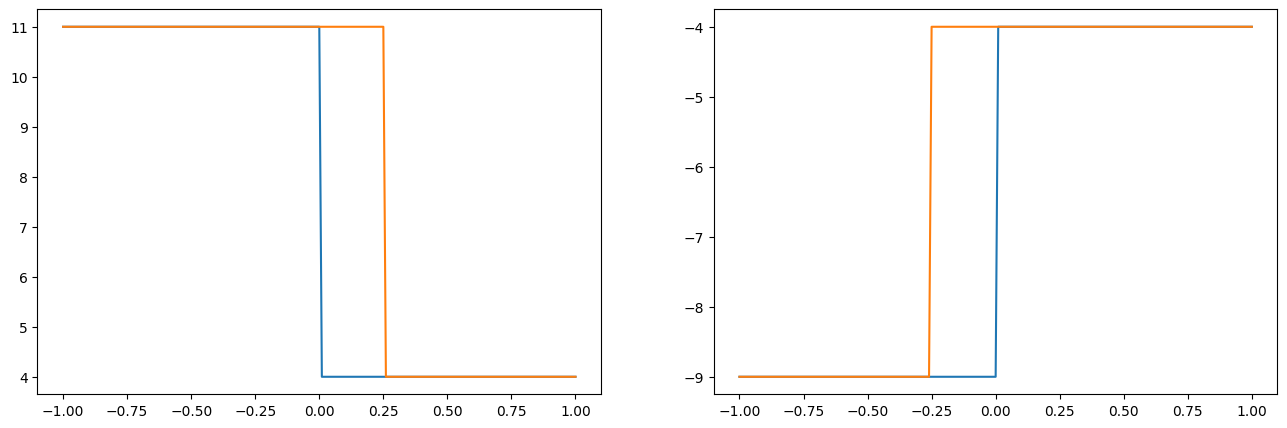

In [134]:
def u_0(_x: np.ndarray):
    return np.where(_x <= 0, u_L, u_R)


def p_0(_x: np.ndarray):
    return np.where(_x <= 0, p_L, p_R)


def u_an(_x: np.ndarray, _t: float):
    return (u_0(_x - c * _t) + u_0(_x + c * _t)) / 2 + (p_0(_x - c * _t) - p_0(_x + c * _t)) / (2 * rho * c)


def p_an(_x: np.ndarray, _t: float):
    return rho * c * (u_0(_x - c * _t) - u_0(_x + c * _t)) / 2 + (p_0(_x - c * _t) + p_0(_x + c * _t)) / 2


def Y(_u: np.ndarray, _p: np.ndarray):
    return _u + _p / (rho * c)


def Y_0(_x: np.ndarray):
    return Y(u_0(_x), p_0(_x))


def Y_an(_x: np.ndarray, _t: float):
    return Y(u_an(_x, _t), p_an(_x, _t))


def Z(_u: np.ndarray, _p: np.ndarray):
    return _u - _p / (rho * c)


def Z_0(_x: np.ndarray):
    return Z(u_0(_x), p_0(_x))


def Z_an(_x: np.ndarray, _t: float):
    return Z(u_an(_x, _t), p_an(_x, _t))


YY_an = np.array([Y_an(xx, t) for t in tt])
ZZ_an = np.array([Z_an(xx, t) for t in tt])

plt.subplot(1, 2, 1)
plt.plot(xx, YY_an[0])
plt.plot(xx, YY_an[-1])

plt.subplot(1, 2, 2)
plt.plot(xx, ZZ_an[0])
plt.plot(xx, ZZ_an[-1])

fig = plt.gcf()
fig.set_size_inches(16, 5)
plt.show()

In [135]:
def solveYZ(a_1, a_2, a_3, a_4, _t=100):
    YY = np.zeros((N, X))
    YY[0] = Y_0(xx)
    YY[1] = Y_an(xx, tt[1])
    YY[:, 0] = np.array([Y_0(xx[0]) for _ in tt])
    YY[:, 1] = np.array([Y_0(xx[1]) for _ in tt])
    YY[:, -1] = np.array([Y_0(xx[-1]) for _ in tt])

    ZZ = np.zeros((N, X))
    ZZ[0] = Z_0(xx)
    ZZ[1] = Z_an(xx, tt[1])
    ZZ[:, 0] = np.array([Z_0(xx[0]) for _ in tt])
    ZZ[:, -2] = np.array([Z_0(xx[-2]) for _ in tt])
    ZZ[:, -1] = np.array([Z_0(xx[-1]) for _ in tt])

    for n in range(1, N - 1):
        YY[n + 1, 2:-1] = a_1 * YY[n, 1:-2] + a_2 * YY[n, 3:] + a_3 * YY[n - 1, 2:-1] + a_4 * YY[n - 1, :-3]

        ZZ[n + 1, 1:-2] = a_1 * ZZ[n, 2:-1] + a_2 * ZZ[n, :-3] + a_3 * ZZ[n - 1, 1:-2] + a_4 * ZZ[n - 1, 3:]

    plt.subplot(1, 2, 1)
    plt.plot(xx, YY[_t])
    plt.plot(xx, YY_an[_t])

    plt.subplot(1, 2, 2)
    plt.plot(xx, ZZ[_t])
    plt.plot(xx, ZZ_an[_t])

    fig = plt.gcf()
    fig.set_size_inches(16, 5)
    plt.show()


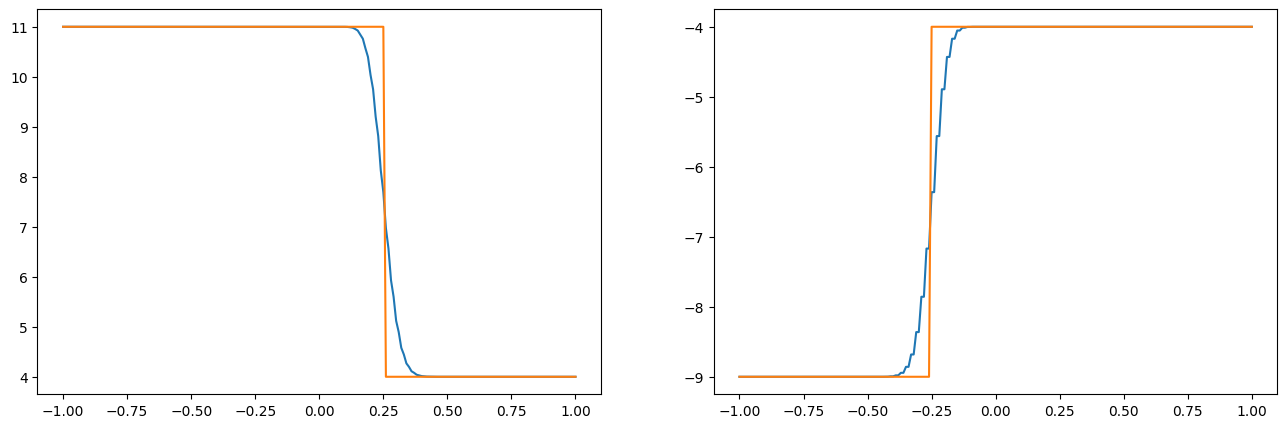

In [136]:
solveYZ(*C_p)

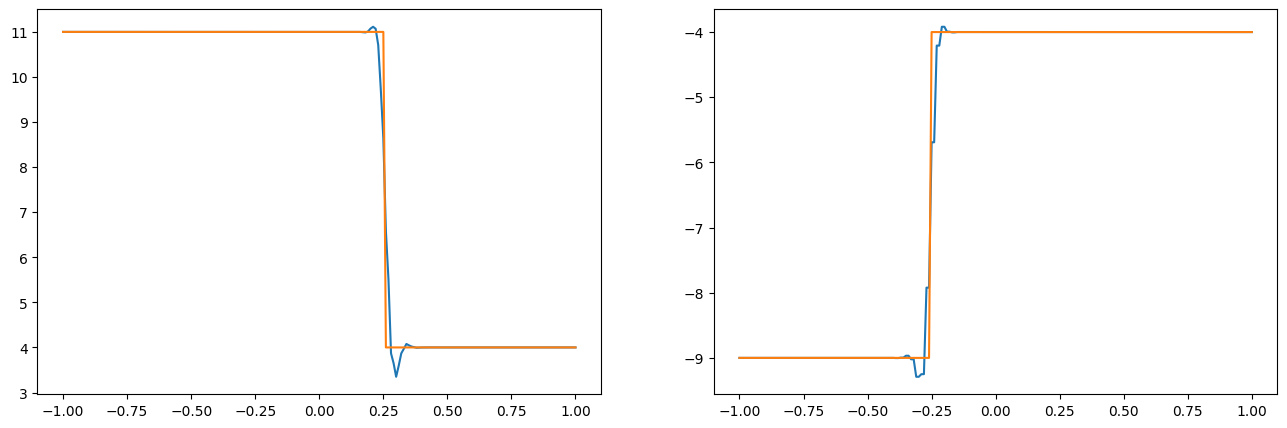

In [137]:
solveYZ(*M_p)

In [138]:
def u(_Y: np.ndarray, _Z: np.ndarray):
    return (_Y + _Z) / 2


def p(_Y: np.ndarray, _Z: np.ndarray):
    return rho * c * (_Y - _Z) / 2


uu_an = u(YY_an, ZZ_an)
pp_an = p(YY_an, ZZ_an)

In [139]:
def solve_up(a_1, a_2, a_3, a_4, _t=100):
    YY = np.zeros((N, X))
    YY[0] = Y_0(xx)
    YY[1] = Y_an(xx, tt[1])
    YY[:, 0] = np.array([Y_0(xx[0]) for _ in tt])
    YY[:, 1] = np.array([Y_0(xx[1]) for _ in tt])
    YY[:, -1] = np.array([Y_0(xx[-1]) for _ in tt])

    ZZ = np.zeros((N, X))
    ZZ[0] = Z_0(xx)
    ZZ[1] = Z_an(xx, tt[1])
    ZZ[:, 0] = np.array([Z_0(xx[0]) for _ in tt])
    ZZ[:, -2] = np.array([Z_0(xx[-2]) for _ in tt])
    ZZ[:, -1] = np.array([Z_0(xx[-1]) for _ in tt])

    for n in range(1, N - 1):
        YY[n + 1, 2:-1] = a_1 * YY[n, 1:-2] + a_2 * YY[n, 3:] + a_3 * YY[n - 1, 2:-1] + a_4 * YY[n - 1, :-3]

        ZZ[n + 1, 1:-2] = a_1 * ZZ[n, 2:-1] + a_2 * ZZ[n, :-3] + a_3 * ZZ[n - 1, 1:-2] + a_4 * ZZ[n - 1, 3:]

    uu = u(YY, ZZ)
    pp = p(YY, ZZ)

    plt.subplot(1, 2, 1)
    plt.title('u')
    plt.grid()
    plt.plot(xx, uu[_t])
    plt.plot(xx, uu_an[_t])

    plt.subplot(1, 2, 2)
    plt.title('p')
    plt.grid()
    plt.plot(xx, pp[_t])
    plt.plot(xx, pp_an[_t])

    fig = plt.gcf()
    fig.set_size_inches(16, 5)
    plt.show()


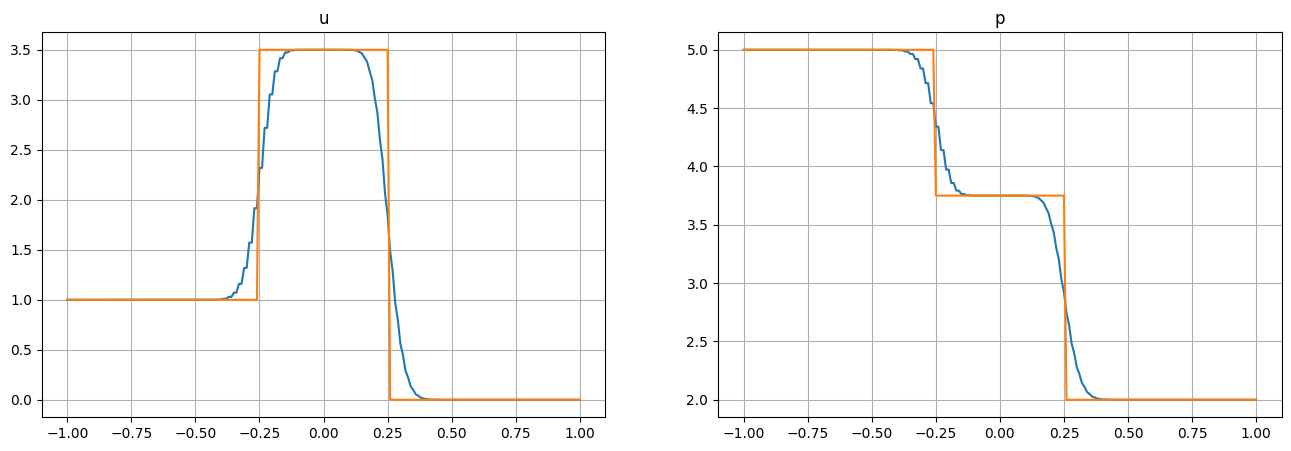

In [140]:
solve_up(*C_p)

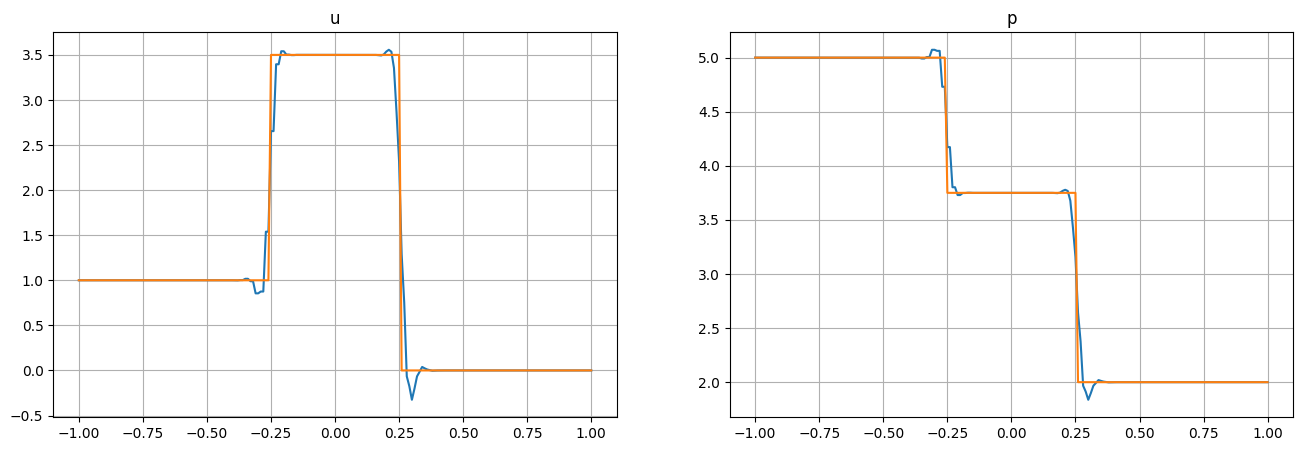

In [141]:
solve_up(*M_p)

In [142]:
M1_p = (323 / 500, -7 / 100, 151 / 250, -9 / 50)
M2_p = (47 / 100, -3 / 20, 39 / 50, -1 / 10)
M3_p = (1 / 2, -3 / 22, 3 / 4, -5 / 44)

In [167]:
def stepY(aa, u, n, j):
    return aa[0] * u[n][j - 1] + aa[1] * u[n][j + 1] + aa[2] * u[n - 1][j] + aa[3] * u[n - 1][j - 2]


def stepZ(aa, u, n, j):
    return aa[0] * u[n][j + 1] + aa[1] * u[n][j - 1] + aa[2] * u[n - 1][j] + aa[3] * u[n - 1][j + 2]


def hybrid_solve_up(coef, _t=100):
    YY = np.zeros((N, X))
    YY[0] = Y_0(xx)
    YY[1] = Y_an(xx, tt[1])
    YY[:, 0] = np.array([Y_0(xx[0]) for _ in tt])
    YY[:, 1] = np.array([Y_0(xx[1]) for _ in tt])
    YY[:, -1] = np.array([Y_0(xx[-1]) for _ in tt])

    ZZ = np.zeros((N, X))
    ZZ[0] = Z_0(xx)
    ZZ[1] = Z_an(xx, tt[1])
    ZZ[:, 0] = np.array([Z_0(xx[0]) for _ in tt])
    ZZ[:, -2] = np.array([Z_0(xx[-2]) for _ in tt])
    ZZ[:, -1] = np.array([Z_0(xx[-1]) for _ in tt])

    YY = YY.tolist()
    ZZ = ZZ.tolist()

    for n in range(1, N - 1):
        for j in range(2, X - 1):
            for c in coef:
                YY[n + 1][j] = stepY(c, YY, n, j)
                Y_min = min(YY[n][j - 1], YY[n - 1][j])
                Y_max = max(YY[n][j - 1], YY[n - 1][j])
                if Y_min <= YY[n + 1][j] <= Y_max:
                    break

        for j in range(X - 3, 0, -1):
            for c in coef:
                ZZ[n + 1][j] = stepZ(c, ZZ, n, j)
                Z_min = min(ZZ[n][j + 1], ZZ[n - 1][j])
                Z_max = max(ZZ[n][j + 1], ZZ[n - 1][j])
                if Z_min <= ZZ[n + 1][j] <= Z_max:
                    break

    YY = np.array(YY)
    ZZ = np.array(ZZ)
    uu = u(YY, ZZ)
    pp = p(YY, ZZ)

    plt.subplot(1, 2, 1)
    plt.title('u')
    plt.grid()
    plt.plot(xx, uu[_t])
    plt.plot(xx, uu_an[_t])

    plt.subplot(1, 2, 2)
    plt.title('p')
    plt.grid()
    plt.plot(xx, pp[_t])
    plt.plot(xx, pp_an[_t])

    fig = plt.gcf()
    fig.set_size_inches(16, 5)
    plt.show()

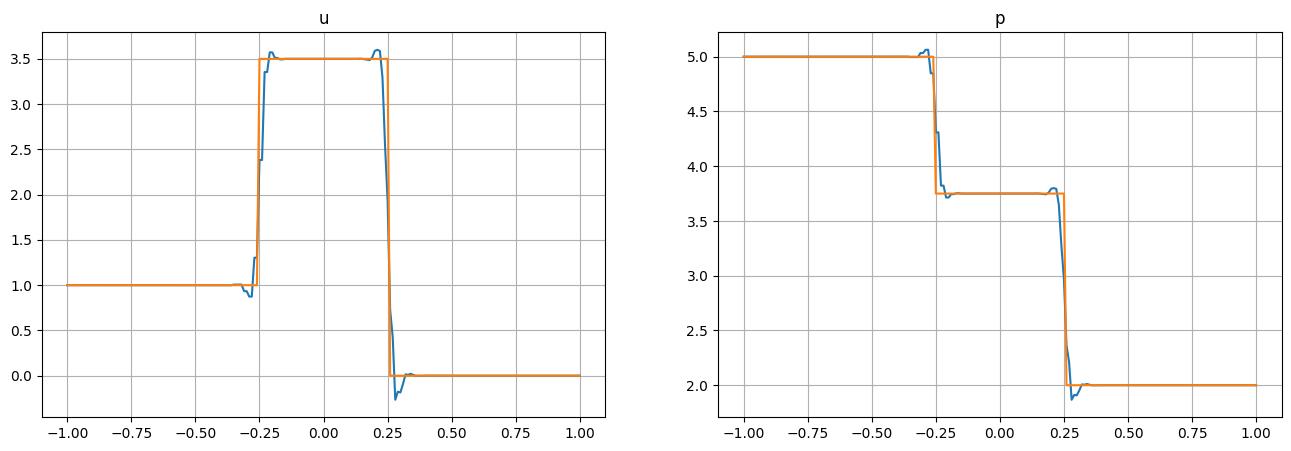

In [168]:
hybrid_solve_up([M3_p, M2_p, M1_p])